<a href="https://www.kaggle.com/code/doctortorsten/yuce-8-stock-market-forecasts?scriptVersionId=106907817" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a href="https://colab.research.google.com/github/yuce-8/public-api-client/blob/main/Public_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this is an enhaced version provided by www.yuce-8.tech at https://github.com/yuce-8/public-api-client

This client allows you to retrieve the Bitcoin & Ethereum forecasts created by YUCE-8 (aka Y8). Please read the [terms & conditions](https://github.com/yuce-8/public-api-client) before using this code and the related YUCE-8 service.

# download & import the latest release

In [1]:
# GIT-CLONE for non Kaggle environments:
!git clone https://github.com/yuce-8/public-api-client.git
import sys
sys.path.insert(0,"public-api-client")
from y8_api_client_lib import Y8_API_CLIENT

Cloning into 'public-api-client'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 65 (delta 31), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (65/65), 402.34 KiB | 1.21 MiB/s, done.


# create a new Y8 Client with your ID
for R&D purposes we can use *johndoe* as ID

In [2]:
Y8 = Y8_API_CLIENT('johndoe')

# get the latest forecast
available forecasts are the following combinations:


1.   BTCUSD - 4hour
2.   BTCUSD - 30min
3.   ETHUSD - 4hour



In [3]:
import datetime
import traceback
import pytz
import json
import requests
import time
import concurrent.futures


f_0 = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)

## analyse the forecast




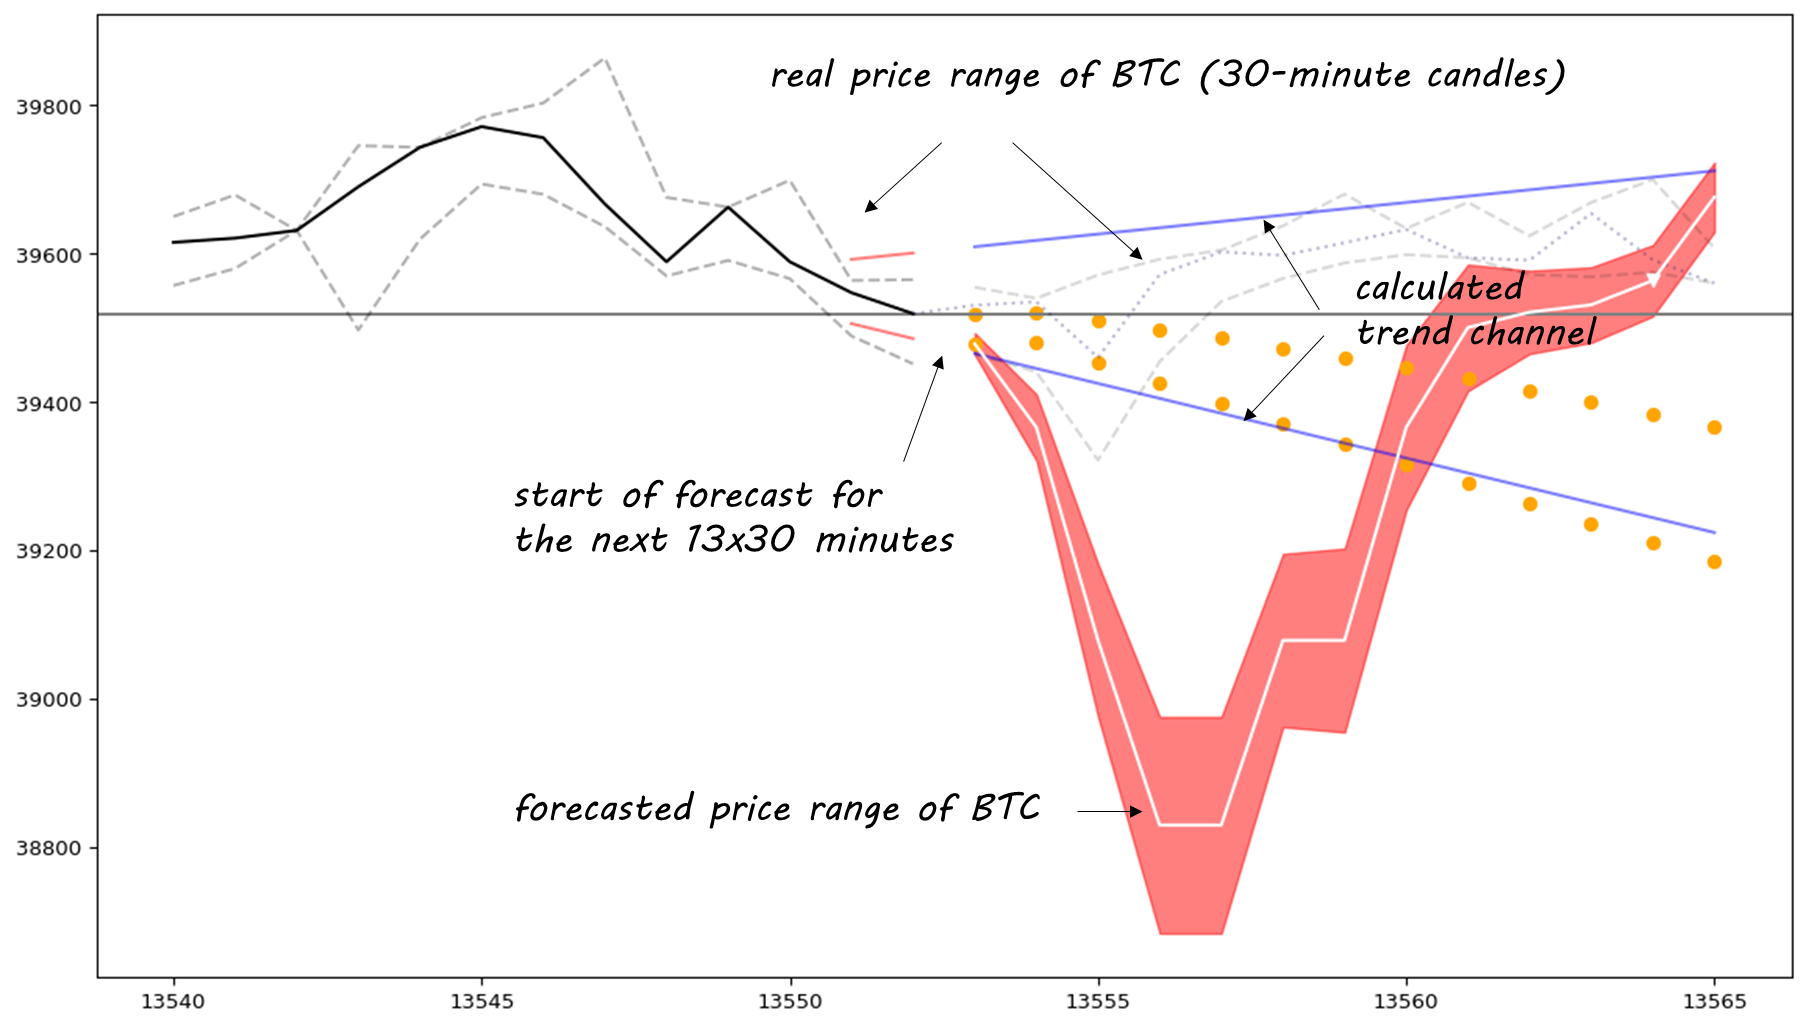


a forecast *f_0* has multiple parameters:


*   **forecast start date**: the date & time of the quote when the forecast was executed
*   **forecast start price**: the price of the quote in USD when the forecast was executed
*   **accuracy of backtesting**: the accuracy of the backtest that was executed for the selected model; level_1 measures the accuracy of positive / negative projections regarding the forecast start price (ie. is it above or below the starting price)
*   **forecasted prices top**: the upper range of the forecasted price projection
*   **forecasted prices bottom**: the lower range of the forecasted price projection
*   **forecasted resistance price**: the forecasted resistance that may have an impact on the price direction
*   **forecasted support price**: the forecasted support that may have an impact on the price direction
*   **calculated trendline #1 & #2**: the latest trends that shaped the price development in the past
*   **confidence top & bottom**: 80% confidence of the up & down price movements of the past 90 quotes projected into the future









In [4]:
accuracy_of_backtesting = f_0['level_1']
forecast_start_date = f_0['last_date']
forecast_start_price = f_0['last_quote']
forecasted_future_prices_top = f_0['quotes_forecast_top_incl_vola']
forecasted_future_prices_bottom = f_0['quotes_forecast_bottom_incl_vola']
forecasted_next_resistance_price = f_0['next_resistance']
forecasted_next_support_price = f_0['next_support']
calculated_trendline_1 = f_0['trendline_extended_1']
calculated_trendline_2 = f_0['trendline_extended_2']
price_confidence_bottom = f_0['confidence_extended_1']
price_confidence_top = f_0['confidence_extended_2']

# output
print('the forecast was executed at ', forecast_start_date, ' when the price was ', forecast_start_price)

print('for the next timesteps the following future price ranges were projected:')
for i in range(0, len(forecasted_future_prices_top)):
  print('\tt +', (i+1), ' ==> ]', round(forecasted_future_prices_bottom[i]), ', ', round(forecasted_future_prices_top[i]), '[')

print('the forecated next resistance price: ', round(forecasted_next_resistance_price))
print('the forecated next support price   : ', round(forecasted_next_support_price))

print('price confidence of the past 90 quotes:')
for i in range(0, len(price_confidence_bottom)):
  print('\tt +', (i+1), ' ==> [', round(price_confidence_bottom[i]), ', ', round(price_confidence_top[i]), ']')

the forecast was executed at  2022-09-30 15:44:11  when the price was  19358.23046875
for the next timesteps the following future price ranges were projected:
	t + 1  ==> ] 19326 ,  19374 [
	t + 2  ==> ] 19265 ,  19364 [
	t + 3  ==> ] 19234 ,  19358 [
	t + 4  ==> ] 19298 ,  19358 [
	t + 5  ==> ] 19265 ,  19392 [
	t + 6  ==> ] 19312 ,  19395 [
	t + 7  ==> ] 19317 ,  19475 [
	t + 8  ==> ] 19284 ,  19464 [
	t + 9  ==> ] 19278 ,  19439 [
	t + 10  ==> ] 19298 ,  19517 [
	t + 11  ==> ] 19329 ,  19502 [
	t + 12  ==> ] 19221 ,  19406 [
	t + 13  ==> ] 19322 ,  19542 [
the forecated next resistance price:  19506
the forecated next support price   :  19050
price confidence of the past 90 quotes:
	t + 1  ==> [ 19351 ,  19377 ]
	t + 2  ==> [ 19353 ,  19379 ]
	t + 3  ==> [ 19357 ,  19390 ]
	t + 4  ==> [ 19361 ,  19400 ]
	t + 5  ==> [ 19363 ,  19407 ]
	t + 6  ==> [ 19366 ,  19415 ]
	t + 7  ==> [ 19370 ,  19422 ]
	t + 8  ==> [ 19374 ,  19427 ]
	t + 9  ==> [ 19374 ,  19428 ]
	t + 10  ==> [ 19374 ,  194

# visualize the latest forecast

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:111: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:112: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:113: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.


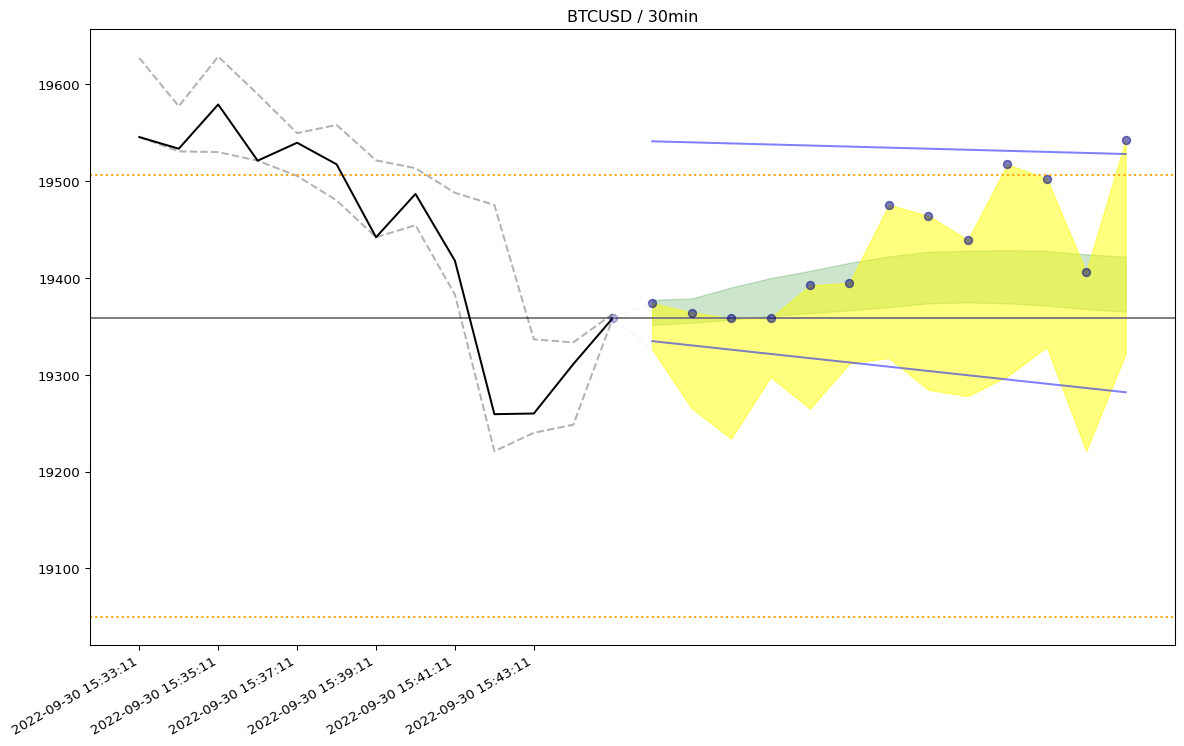

In [5]:
SYMBOL = Y8_API_CLIENT.BTCUSD
INTERVAL = Y8_API_CLIENT.INTERVAL_30MIN


# load the historical quotes:
df = Y8.get_historical_quotes(symbol=SYMBOL, interval=INTERVAL)

# load the lastest forecast:
forecast = Y8.get_latest_forecast(symbol=Y8_API_CLIENT.BTCUSD, interval=Y8_API_CLIENT.INTERVAL_30MIN)


# prepare plot

def plot_forecast(df, forecast):
    import matplotlib.pyplot as plt
    import matplotlib as mpl
    import datetime
    
    def to_datetime(x):
        x = str(x).replace('T', ' ')
        if len(x) > 19:
          x = x[:19]
        elif len(x) == 10:
          x = x + '00:00:00'
        return datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S")

    dpi = 96
    width = 1400
    height = 800 # 800
    mpl.rcParams.update(mpl.rcParamsDefault)
    fig = plt.figure(figsize=(width/dpi, height/dpi), dpi=dpi)
    plt.rcParams["axes.grid"] = False
    plt.style.use("seaborn-bright")
    plt.rcParams['axes.facecolor'] = 'white'
    fig.patch.set_facecolor('white')
    future_dates = []  
    all_indizes = []
    fill_colors = ['darkorange', 'mediumspringgreen', 'midnightblue']
    color_counter = -1  
    level_1 = forecast['level_1']
    level_2 = forecast['level_2']
    model_name = forecast['model_name']
    training_date = forecast['training_date']
    last_date_of_forecast = forecast['last_date']
    last_quote_of_forecast = forecast['last_quote']
    forecasted_values = forecast['forecast']
    sl_before, sl_after = forecast['next_support'], forecast['next_resistance'] 
    is_negative = forecast['is_negative']
    confidence_extended_1 = forecast['confidence_extended_1']
    confidence_extended_2 = forecast['confidence_extended_2']
    forecasted_future_prices_top = forecast['quotes_forecast_top_incl_vola']
    forecasted_future_prices_bottom = forecast['quotes_forecast_bottom_incl_vola']



    all_quotes_until_forecast = df.loc[df.Date_ <= last_date_of_forecast]
    all_quotes_after_forecast = df.loc[df.Date_ > last_date_of_forecast]  
    
    history = len(all_quotes_after_forecast)
    all_dates_of_prediction = all_quotes_until_forecast.Date_.values
    true_date_interval = (to_datetime(all_dates_of_prediction[-1]) - to_datetime(all_dates_of_prediction[-2])).total_seconds() // 60
    
    df = df if history == 0 else all_quotes_until_forecast
    if len(all_quotes_after_forecast) > 0:
        true_highs = all_quotes_after_forecast.High.head(len(forecasted_future_prices_top)).values
        true_lows = all_quotes_after_forecast.Low.head(len(forecasted_future_prices_top)).values
        true_closings = all_quotes_after_forecast.Close.head(len(forecasted_future_prices_top)).values
        true_dates = [to_datetime(d) for d in all_quotes_after_forecast.Date_.head(len(forecasted_future_prices_top)).values]
        future_dates = [true_dates[-1] + datetime.timedelta(minutes=true_date_interval * i) for i in range(1, len(forecasted_future_prices_top) + 1)]
        history = 1
    plot_history = len(forecasted_values)
    
    last_quotes = df['Close'].tail(plot_history).values
    last_highs = df['High'].tail(plot_history).values
    last_lows = df['Low'].tail(plot_history).values
    indizes = df['Close'].tail(plot_history).index
    indizes_2 = []

    last_quote = df['Close'].tail(1).values[0]
    indizes_forecast = range(indizes[-1] + 1, indizes[-1]+len(forecasted_values) + 1)
    
    bridge_indizes = [indizes[-1], indizes_forecast[0]]
    bridge_values_1 = [last_quote, forecasted_future_prices_top[0]]
    bridge_values_2 = [last_quote, forecasted_future_prices_bottom[0]]

    
    if history > 0:
        shoting_factor = 0 #if history_size < len(predicted_labels_orig) + 3 else len(predicted_labels_orig) + 5
        last_quotes_2 = true_closings.tolist()
        indizes_2 = list(range(list(indizes_forecast)[0], list(indizes_forecast)[0] + len(true_closings)))
        last_quotes_2.insert(0, last_quote_of_forecast)
        indizes_2.insert(0, indizes[-1])
        last_quotes_2 = last_quotes_2[:plot_history+1]
        indizes_2 = indizes_2[:plot_history+1]
        plt.plot(indizes_2, last_quotes_2, ':', color='midnightblue', label='Real Close', alpha=0.3)
        plt.plot(indizes_2[-1 * len(true_highs):], true_highs, '--', color='black', alpha=0.15)
        plt.plot(indizes_2[-1 * len(true_highs):], true_lows, '--', color='black', alpha=0.15)


    plt.axhline(y=last_quotes[-1], color='grey', linestyle='-')
    plt.plot(indizes, last_quotes, color='black', label='Close')
    plt.plot(indizes, last_lows, '--', alpha=0.3, color='black', label='High')
    plt.plot(indizes, last_highs, '--', alpha=0.3, color='black', label='High')

    
    a = 0.3
    redyellow = 'yellow' if not is_negative else 'red'
    plt.fill_between(indizes_forecast, confidence_extended_1, confidence_extended_2, color='green', alpha=0.2)
    plt.fill_between(indizes_forecast, forecasted_future_prices_top, forecasted_future_prices_bottom, color=redyellow, alpha=0.5)

    plt.plot(indizes[-1], last_quotes[-1], 'bo', label='Forecast', alpha=a, color='navy')
    plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')
    plt.plot(indizes_forecast, forecasted_future_prices_top, 'bo', label='Forecast', alpha=a, color='navy')
    
    if sl_before != -1:
        plt.axhline(sl_before, ls=':', color='orange')
    if sl_after != 9999999999:
        plt.axhline(sl_after, ls=':', color='orange')  
        
    trend_1 = forecast['trendline_extended_1'] # extend_trendline(trend_lines[0], iterations=len(indizes_forecast))
    trend_2 = forecast['trendline_extended_2'] # extend_trendline(
    plt.plot(indizes_forecast, trend_1, color='blue', alpha=0.5)
    plt.plot(indizes_forecast, trend_2, color='blue', alpha=0.5)
      
      

    default_distance = (indizes_forecast[1] - indizes_forecast[0]) // 2
    plt.plot(bridge_indizes, bridge_values_1, '--', color='lavender', alpha=a)
    plt.plot(bridge_indizes, bridge_values_2, '--', color='lavender', alpha=a)
    all_indizes = [*all_indizes, *indizes, *indizes_2]


    
    plt.title(SYMBOL + ' / ' + INTERVAL)
    all_indizes = list(set(all_indizes))[::2]
    
    all_indizes = [*indizes, *indizes_2]
    all_indizes = all_indizes[::2]
      # printd('** all_indizes: ', all_indizes)
    
    last_date_of_forecast = to_datetime(last_date_of_forecast)
    new_future_dates = [last_date_of_forecast + datetime.timedelta(minutes=true_date_interval * i) for i in range(1, len(forecasted_future_prices_top) + 1, 2)]
    date_array = [last_date_of_forecast - datetime.timedelta(minutes=true_date_interval * i) for i in range(len(last_quotes) - 2, 0, -2)] + [last_date_of_forecast] + new_future_dates

    if len(all_indizes) < len(date_array):
        all_indizes = all_indizes[:len(all_indizes)-1]
        date_array = date_array[:len(all_indizes)]
    
    plt.xticks(all_indizes, date_array, rotation=30, ha='right')
    plt.show()

plot_forecast(df, forecast)


# load the historical forecasts
all forecasts that were created in the past

In [6]:
import requests
import json

f_0_history = Y8.get_historical_forecasts(symbol=SYMBOL, interval=INTERVAL)

# load the historical quotes:
df = df if not df is None and len(df) > 0 else Y8.get_historical_quotes(symbol=SYMBOL, interval=INTERVAL)

print('there are ', len(f_0_history), ' historical forecasts available:')

for historical_f_0 in f_0_history:
  h_forecast_start_date = historical_f_0['last_date']
  h_forecast_start_price = round(historical_f_0['last_quote'])
  print('\t historical forecast from ', h_forecast_start_date, ' / ', h_forecast_start_price)
  plot_forecast(df, historical_f_0)

there are  0  historical forecasts available:


# get the latest signal
Y8 tries to forecast the future price volatitily. A 2nd R&D projects tries to interpret these forecasts in terms of good and bad opportunities ("*signals*"). The Y8 team uses these *signals* to trade its own real money account.

A signal contains the following fields:

*   **ID**: a unique number
*   **DIRECTION**: is either *LONG* for a buy opportunity or *SHORT* for a sell opportunity. If the trade was closed in the real money depot the direction has the value *CLOSED*
*   **PRICE_OF_INVESTMENT**: the opening or closing price of the trade
*   **TIMESTAMP**: the datetime of the account operation





In [7]:
Y8.get_latest_signal(symbol=Y8_API_CLIENT.BTCUSD)

{'ID': 586746,
 'DIRECTION': 'CLOSED',
 'UNDERLYING': 'ETHUSD',
 'PRICE_OF_INVESTMENT': 19799.6,
 'TIMESTAMP': '2022-09-27 03:35:02'}